### ***--> Installing the required libraries***

In [1]:
pip install pandas matplotlib seaborn prophet scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

### ***--> Loading Daily Data***

In [4]:
import pandas as pd

# Load the yearly dataset
file_path = "C:/Users/Saiku/Downloads/SN_y_tot_V2.0.csv"  # Update this with the correct path
data = pd.read_csv(file_path, delimiter=';', header=None)
# Select only the relevant columns
data = data[[0, 1]]  # Adjust indices based on the dataset structure

# Rename selected columns
data.columns = ['Year', 'Mean Sunspot Number']

# Drop rows with missing values (if necessary)
data = data[data['Mean Sunspot Number'] >= 0]

# Convert 'Year' to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Prepare data for Prophet
data = data[['Year', 'Mean Sunspot Number']].rename(columns={'Year': 'ds', 'Mean Sunspot Number': 'y'})


In [5]:
data['y'] = data['y'].replace(0, 1e-6)  # Replace zeros with a small positive value

In [6]:
data['y'] = data['y'].apply(lambda x: np.log(x + 1e-6))  # Log transform with small constant

In [7]:
data = data[data['y'] > 0]  # Remove zero values

In [9]:
# Convert the 'ds' column to datetime and handle invalid dates
data['ds'] = pd.to_datetime(data['ds'], errors='coerce')

# Remove rows with invalid or out-of-bounds dates
data = data.dropna(subset=['ds'])

# Optionally, filter to ensure dates are within Prophet's supported range
valid_start_date = pd.Timestamp("1900-01-01")
valid_end_date = pd.Timestamp("2100-01-01")
data = data[(data['ds'] >= valid_start_date) & (data['ds'] <= valid_end_date)]

In [10]:
from prophet import Prophet

model = Prophet()
model.fit(data)

20:48:31 - cmdstanpy - INFO - Chain [1] start processing
20:48:32 - cmdstanpy - INFO - Chain [1] done processing


###***--> Training the FBProphet Model***

20:48:50 - cmdstanpy - INFO - Chain [1] start processing
20:48:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Saiku\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


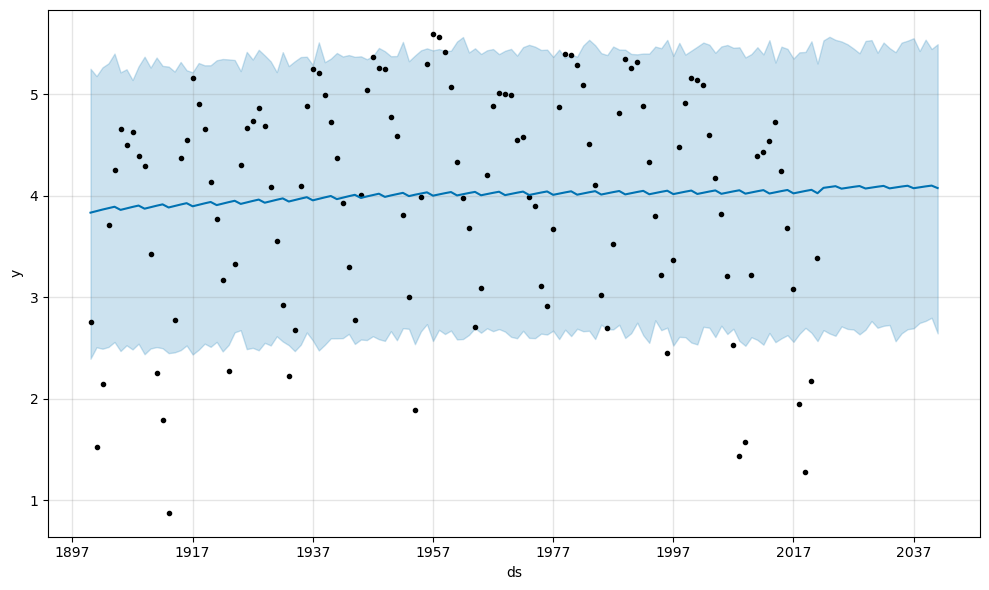

In [11]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet()
model.fit(data)

# Generate future dates and forecast
future = model.make_future_dataframe(periods=20, freq='Y')  # Forecast for 20 years
forecast = model.predict(future)

# Plot results
from matplotlib import pyplot as plt
fig = model.plot(forecast)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      322 non-null    int32  
 1   y       322 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 3.9 KB
None
   ds     y
0   0   8.3
1   1  18.3
2   2  26.7
3   3  38.3
4   4  60.0


20:48:59 - cmdstanpy - INFO - Chain [1] start processing
20:48:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Saiku\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


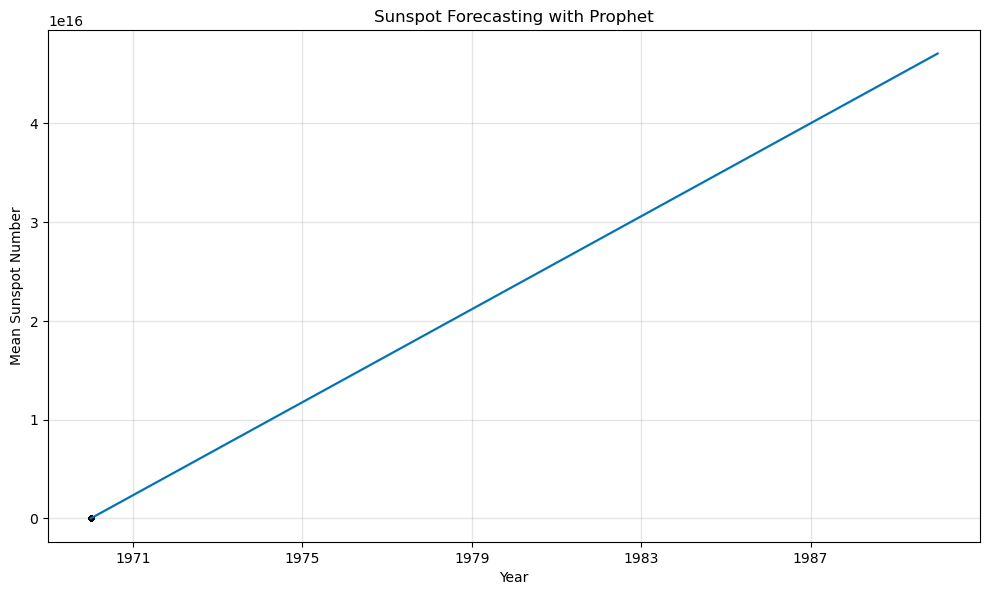

In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("SN_y_tot_V2.0.csv", delimiter=';', header=None)
data = data[[0, 1]]
data.columns = ['Year', 'Mean Sunspot Number']

# Filter out invalid values
data = data[data['Mean Sunspot Number'] >= 0]

# Convert 'Year' to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Rename columns for Prophet
data = data.rename(columns={'Year': 'ds', 'Mean Sunspot Number': 'y'})

# Normalize 'ds' to years (relative to the minimum year)
data['ds'] = (data['ds'].dt.year - data['ds'].dt.year.min())

# Check data types and print first few rows
print(data.info())
print(data.head())

# Initialize Prophet
model = Prophet()

# Fit the model
model.fit(data)

# Make predictions for the next 20 years
future = model.make_future_dataframe(periods=20, freq='Y')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Sunspot Forecasting with Prophet")
plt.xlabel("Year")
plt.ylabel("Mean Sunspot Number")
plt.show()

Forecast['ds'] is already datetime.


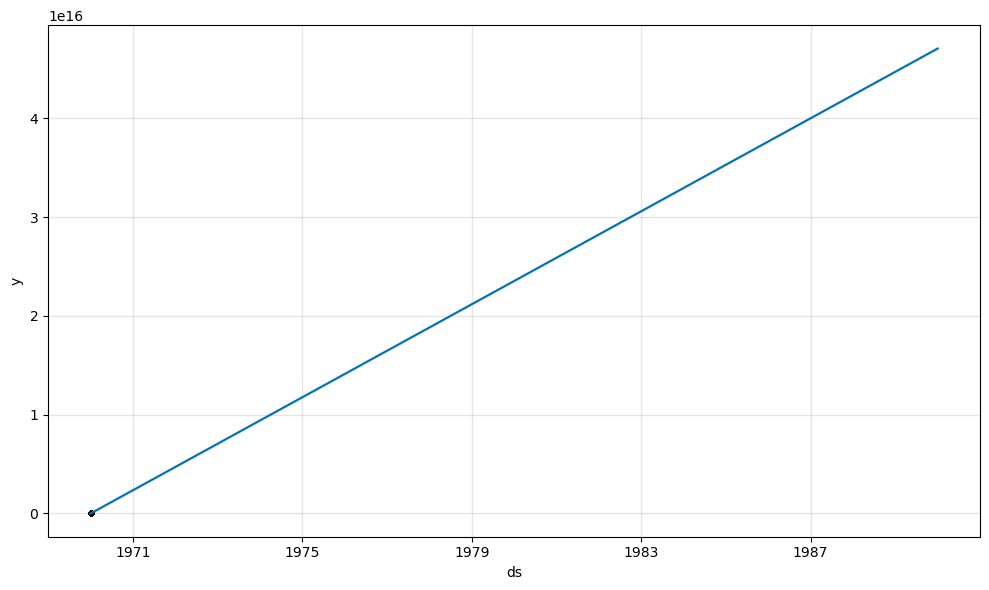

In [20]:
# Step 1: Convert data['ds'] to datetime
data['ds'] = pd.to_datetime(data['ds'], errors='coerce')

# Step 2: Remove invalid dates
data = data.dropna(subset=['ds'])

# Step 3: Get the minimum year
min_year = data['ds'].dt.year.min()

# Step 4: Check if forecast['ds'] is numeric or datetime
if forecast['ds'].dtype != 'datetime64[ns]':
    try:
        # Adjust forecast['ds'] if it's numeric
        forecast['ds'] = min_year + forecast['ds'].astype(int)
    except ValueError as e:
        print("Error adjusting forecast['ds']:", e)
else:
    print("Forecast['ds'] is already datetime.")

# Step 5: Plot the forecast
fig = model.plot(forecast)

In [22]:
# Ensure 'ds' is datetime
data['ds'] = pd.to_datetime(data['ds'], errors='coerce')

# Filter out invalid dates
data = data[(data['ds'] >= '1900-01-01') & (data['ds'] <= '2100-01-01')]

# Find the minimum year
min_year = data['ds'].min()

# Calculate relative years safely
data['ds_years'] = (data['ds'] - min_year).dt.days / 365.25

21:08:54 - cmdstanpy - INFO - Chain [1] start processing
21:08:54 - cmdstanpy - INFO - Chain [1] done processing


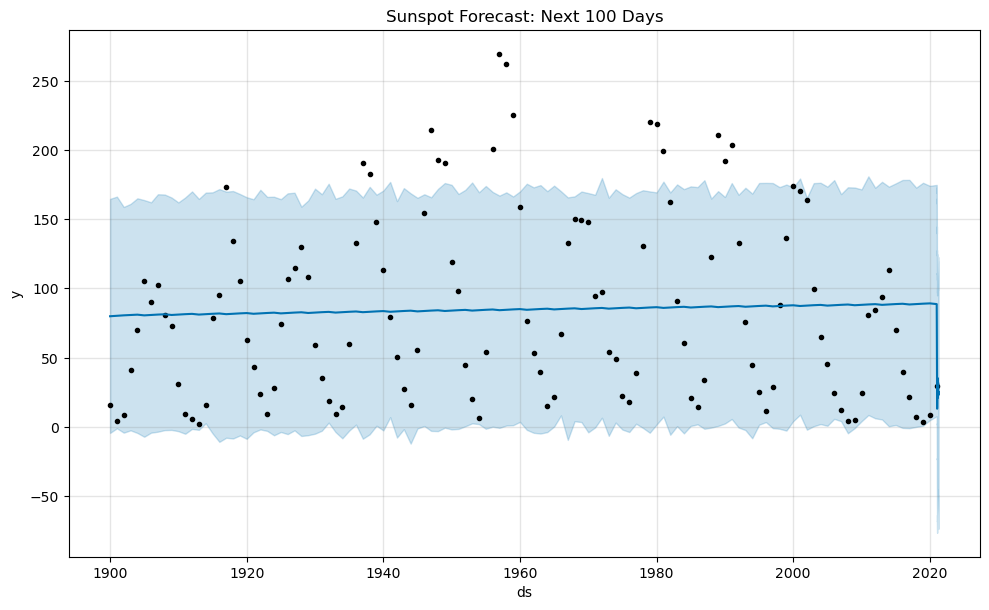

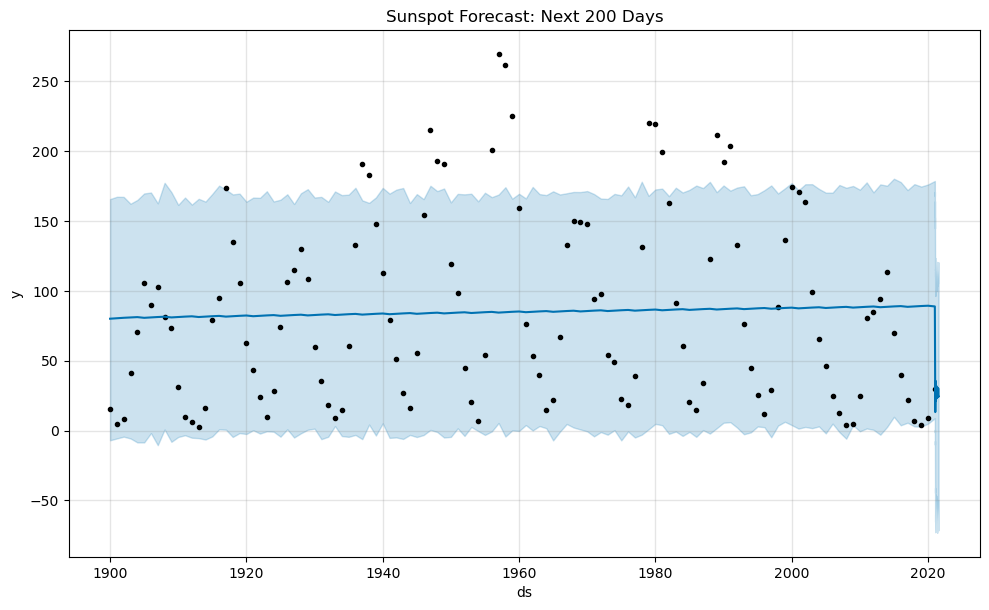

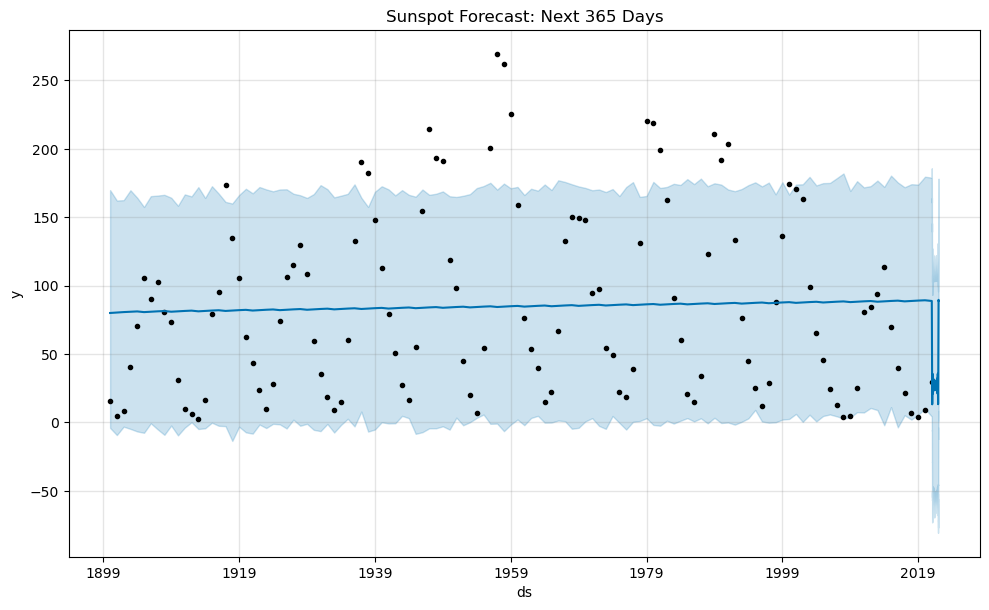

In [23]:
daily_model = Prophet()

# Fit the model with your data
daily_model.fit(data)
# Predict for 100, 200, and 365 days
future_daily_100 = daily_model.make_future_dataframe(periods=100)
future_daily_200 = daily_model.make_future_dataframe(periods=200)
future_daily_365 = daily_model.make_future_dataframe(periods=365)

# Predict 100 days
forecast_daily_100 = daily_model.predict(future_daily_100)

# Predict 200 days
forecast_daily_200 = daily_model.predict(future_daily_200)

# Predict 365 days
forecast_daily_365 = daily_model.predict(future_daily_365)

# Visualize predictions for each forecast
fig_100 = daily_model.plot(forecast_daily_100)
plt.title("Sunspot Forecast: Next 100 Days")
plt.show()

fig_200 = daily_model.plot(forecast_daily_200)
plt.title("Sunspot Forecast: Next 200 Days")
plt.show()

fig_365 = daily_model.plot(forecast_daily_365)
plt.title("Sunspot Forecast: Next 365 Days")
plt.show()

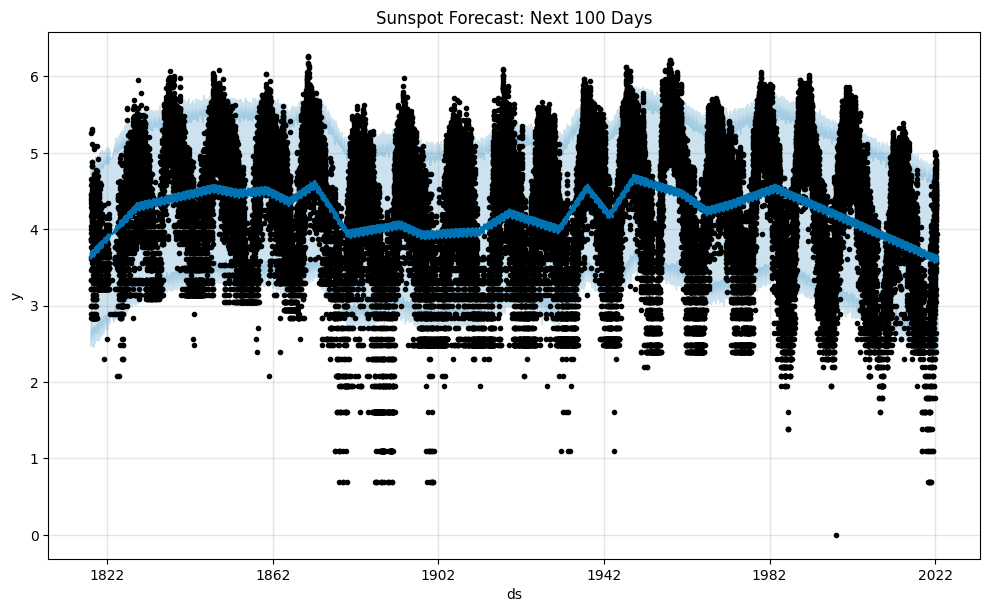

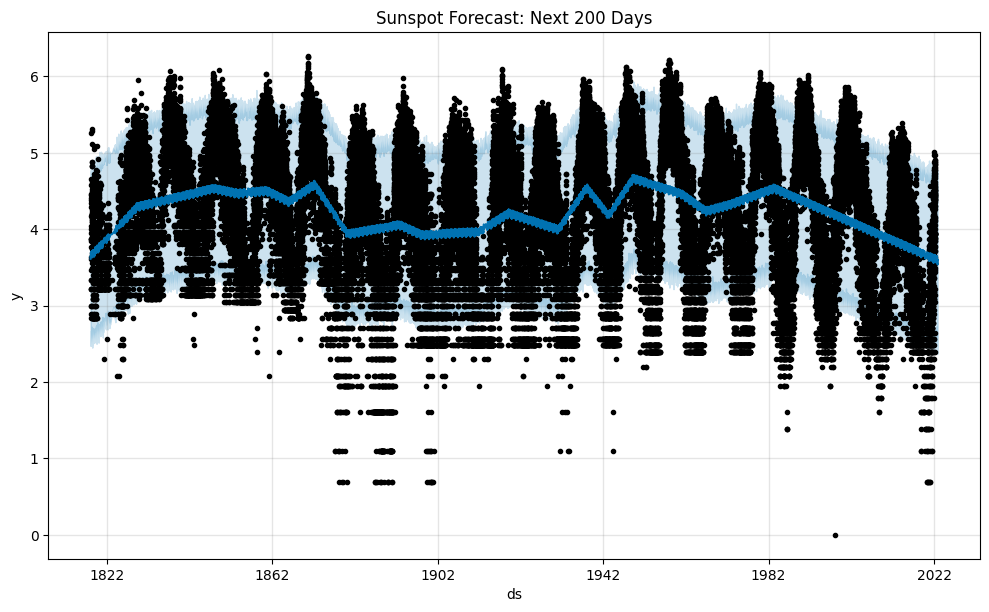

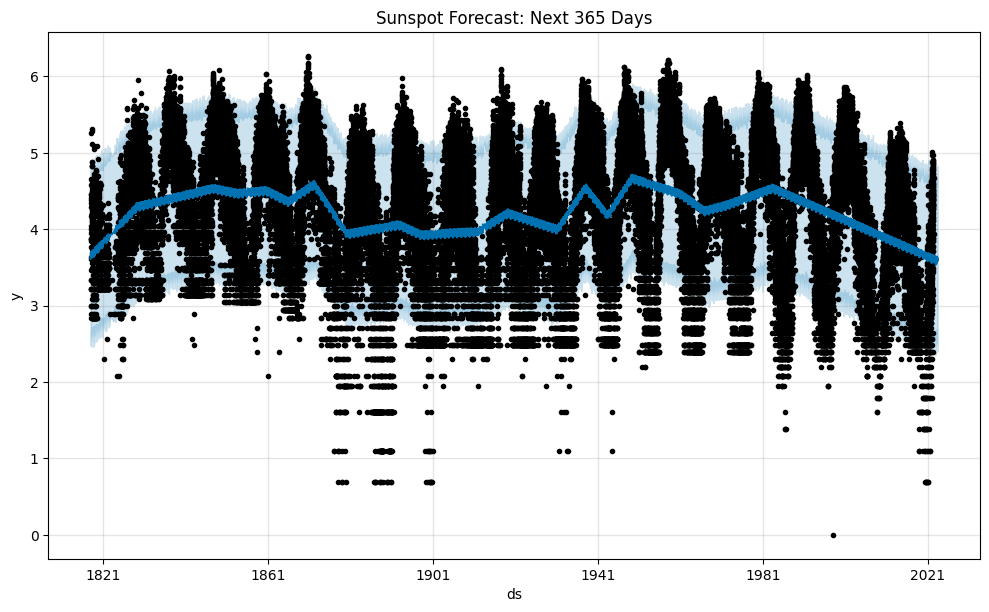

In [ ]:
# Predict for 100, 200, and 365 days
future_daily_100 = daily_model.make_future_dataframe(periods=100)
future_daily_200 = daily_model.make_future_dataframe(periods=200)
future_daily_365 = daily_model.make_future_dataframe(periods=365)

# Predict 100 days
forecast_daily_100 = daily_model.predict(future_daily_100)

# Predict 200 days
forecast_daily_200 = daily_model.predict(future_daily_200)

# Predict 365 days
forecast_daily_365 = daily_model.predict(future_daily_365)

# Visualize predictions for each forecast
fig_100 = daily_model.plot(forecast_daily_100)
plt.title("Sunspot Forecast: Next 100 Days")
plt.show()

fig_200 = daily_model.plot(forecast_daily_200)
plt.title("Sunspot Forecast: Next 200 Days")
plt.show()

fig_365 = daily_model.plot(forecast_daily_365)
plt.title("Sunspot Forecast: Next 365 Days")
plt.show()

In [ ]:
# For 100 days prediction
print("Predicted values for the next 100 days:")
print(forecast_daily_100[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100))

# For 200 days prediction
print("Predicted values for the next 200 days:")
print(forecast_daily_200[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(200))

# For 365 days prediction
print("Predicted values for the next 365 days:")
print(forecast_daily_365[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365))

Predicted values for the next 100 days:
              ds      yhat  yhat_lower  yhat_upper
59985 2022-05-01  3.651582    2.514524    4.651531
59986 2022-05-02  3.654151    2.565673    4.729549
59987 2022-05-03  3.648461    2.557681    4.816173
59988 2022-05-04  3.656910    2.582701    4.745002
59989 2022-05-05  3.646691    2.534458    4.750880
...          ...       ...         ...         ...
60080 2022-08-04  3.590962    2.434680    4.643647
60081 2022-08-05  3.594763    2.450711    4.707601
60082 2022-08-06  3.599316    2.527344    4.666697
60083 2022-08-07  3.605400    2.581125    4.641377
60084 2022-08-08  3.609113    2.541835    4.598702

[100 rows x 4 columns]
Predicted values for the next 200 days:
              ds      yhat  yhat_lower  yhat_upper
59985 2022-05-01  3.651582    2.547354    4.846464
59986 2022-05-02  3.654151    2.554405    4.717680
59987 2022-05-03  3.648461    2.573660    4.786512
59988 2022-05-04  3.656910    2.568068    4.739004
59989 2022-05-05  3.646691   

###***--> Visualizing Predictions***

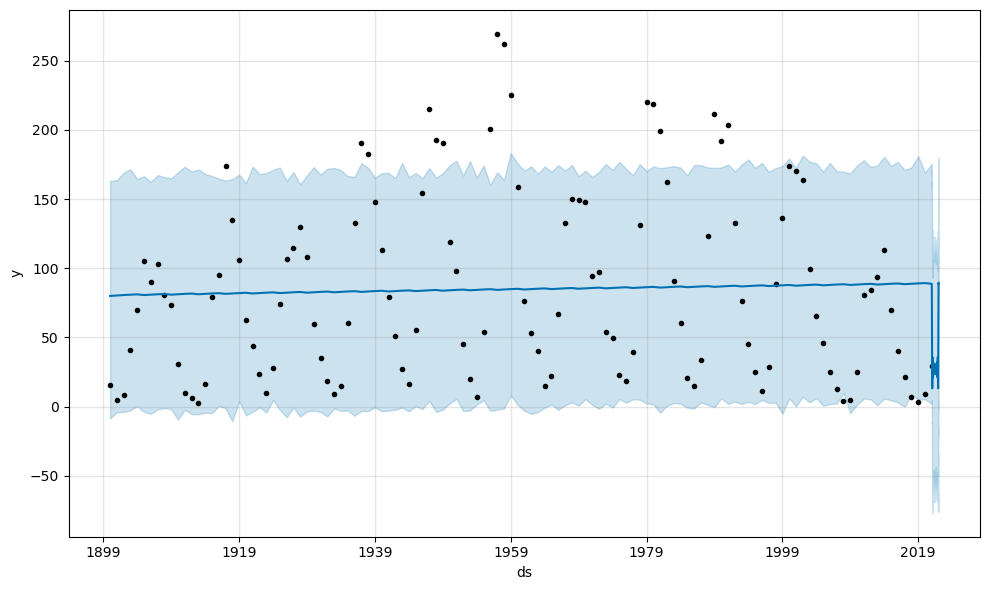

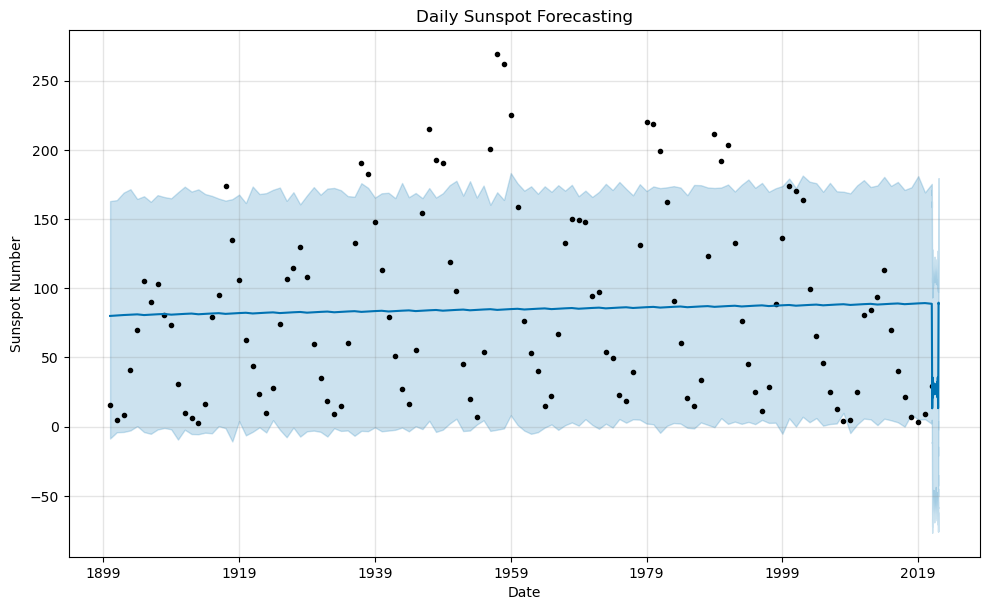

In [25]:
# Generate a future dataframe
future_daily = daily_model.make_future_dataframe(periods=365)

# Predict future values
forecast_daily = daily_model.predict(future_daily)

# Plot the results
fig = daily_model.plot(forecast_daily)
fig = daily_model.plot(forecast_daily)
plt.title("Daily Sunspot Forecasting")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.show()

### ***--> Tune Hyperparameters : Adding custom seasonality***

In [27]:
# Create a sample DataFrame
daily_data = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=365),
    'y': [100 + i for i in range(365)]  # Sample data
})

daily_data['y'] = daily_data['y'].apply(lambda x: np.log(x + 1))

In [28]:
daily_model = Prophet(growth='linear', changepoint_prior_scale=0.05)
daily_model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

# Fit and Predict again
daily_model.fit(daily_data)
forecast_daily = daily_model.predict(future_daily)

21:12:11 - cmdstanpy - INFO - Chain [1] start processing
21:12:11 - cmdstanpy - INFO - Chain [1] done processing


###***--> Evaluating Model Performance***

In [29]:
y_true = daily_data['y'].tail(100)
y_pred = forecast_daily['yhat'][-100:]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}, MAPE: {mape}, R²: {r2}")

MAE: 4.718999346668363, MAPE: 0.7834809471778101, R²: -4590.924319506166
